In [1]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Baca dataset dari file CSV
df = pd.read_csv('DATA_RUMAH.csv')

# Menampilkan 5 baris teratas
df.head(5)

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [3]:
# LB = Luas Bangunan
# LT = Luas Tanah
# KT = Jumlah Kamar Tidur
# KM = Jumlah Kamar Mandi
# GRS = Jumlah Garasi

In [4]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB


In [5]:
# Mengecek apakah ada nilai kosong di dataset
print(df.isnull().sum())

NO            0
NAMA RUMAH    0
HARGA         0
LB            0
LT            0
KT            0
KM            0
GRS           0
dtype: int64


In [6]:
# Mengecek duplicate
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1005    False
1006    False
1007    False
1008    False
1009    False
Length: 1010, dtype: bool

In [7]:
# Fitur dan target
X = df[["LB", "LT", "KT", "KM", "GRS"]] # Fitur
y = df["HARGA"] # Target

In [8]:
# Membagi dataset menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 1. Simple Linear Regression

In [9]:
# Model 1: Simple Linear Regression
lr = LinearRegression()

# Melatih model dengan data training
lr.fit(X_train, y_train)

# Membuat prediksi untuk data test
y_pred_lr = lr.predict(X_test)

# Menghitung R Squared
r2_lr = r2_score(y_test, y_pred_lr)
print(f"R Squared = {r2_lr}")

# Menghitung Mean Squared Error
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error = {mse_lr}")


R Squared = 0.753496622532429
Mean Squared Error = 1.2668059286459404e+19


### 2. Multiple Linear Regression

In [10]:
# Model 2: Multiple Linear Regression
mlr = LinearRegression()

# Melatih model dengan data training
lr.fit(X_train, y_train)

# Membuat prediksi untuk data test
y_pred_mlr = lr.predict(X_test)

# Menghitung R Squared
r2_mlr = r2_score(y_test, y_pred_mlr)
print(f"R squared = {r2_lr}")

# Menghitung Mean Squared Error
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
print(f"Mean Squared Error = {mse_mlr}")

R squared = 0.753496622532429
Mean Squared Error = 1.2668059286459404e+19


### 3. Polynomial Regression

In [11]:
# Model 3: Polynomial Regression
# Membuat objek PolynomialFeatures dengan derajat 4 , degree=4 berarti membuat fitur polynomial hingga pangkat 4
poly = PolynomialFeatures(degree=4)

# Fit dan transformasi 
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Latih regresi linier dengan data pelatihan yang sudah ditransformasi
pr = LinearRegression()
pr.fit(X_poly_train, y_train)

# Membuat prediksi untuk data test
y_pred_poly = pr.predict(X_poly_test)

# Menghitung R Squared
r2_poly = r2_score(y_test, y_pred_poly)
print(f"R squared = {r2_poly}")

# Menghitung Mean Squared Error
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Mean Squared Error = {mse_poly}")

R squared = 0.4992066916982557
Mean Squared Error = 2.5736277470126105e+19


### 4. Support Vector Regression (SVR) 

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

# Membuat objek StandardScaler untuk fitur (X) dan target (y)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Melakukan scaling pada X (fitur) dan y (target) pada data training
X_train_scaled = scaler_X.fit_transform(X_train)

# Ubah y_train menjadi matriks kolom (2D array) untuk proses scaling
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Model 4 : SVR
svr = SVR(kernel='rbf')

# Melatih model dengan data training yang telah di-scale
svr.fit(X_train_scaled, y_train_scaled.ravel())  # .ravel() untuk mengubah y_train menjadi array 1D

# Melakukan scaling pada X_test dan y_test
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Membuat prediksi untuk data test
y_pred_svr_scaled = svr.predict(X_test_scaled)

# Mengembalikan hasil prediksi ke skala asli (mendapatkan prediksi dalam bentuk yang sesuai dengan data asli)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1))

# Menghitung R Squared
r2_svr = r2_score(y_test, y_pred_svr)
print(f"R squared = {r2_svr}")

# Menghitung Mean Squared Error
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"Mean Squared Error = {mse_svr}")


R squared = 0.7526424207945728
Mean Squared Error = 1.2711957582575782e+19


### 5. Decision Tree Regressor

In [13]:
# Model 5: Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Melatih model dengan data training
dt.fit(X_train, y_train)

# Membuat prediksi untuk data test
y_pred_dt = dt.predict(X_test)

# Menghitung R Squared
r2_dt = r2_score(y_test, y_pred_dt)
print(f"R squared = {r2_dt}")

# Menghitung Mean Squared Error
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error = {mse_dt}")

R squared = 0.6619583293502485
Mean Squared Error = 1.7372305276621222e+19


### 6. Random Forest Regressor

In [14]:
# Model 6: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model dengan data training
rf.fit(X_train, y_train)

# Membuat prediksi untuk data test
y_pred_rf = rf.predict(X_test)

# Menghitung R Squared
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R Squared = {r2_rf}")

# Menghitung Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error = {mse_rf}")

R Squared = 0.7978273807588534
Mean Squared Error = 1.0389856532422404e+19


In [15]:
# Menyimpan hasil R² dan MSE untuk perbandingan
results = {
    'Model': ['Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression', 'SVR', 'Decision Tree', 'Random Forest'],
    'R²': [r2_lr, r2_mlr, r2_poly, r2_svr, r2_dt, r2_rf], 
    'MSE': [mse_lr, mse_mlr, mse_poly, mse_svr, mse_dt, mse_rf]
}

# DataFrame untuk hasil
results_df = pd.DataFrame(results)
results_df

,Model,R²,MSE
0,Linear Regression,0.753497,1.266806e+19
1,Multiple Linear Regression,0.753497,1.266806e+19
2,Polynomial Regression,0.499207,2.573628e+19
3,SVR,0.752642,1.271196e+19
4,Decision Tree,0.661958,1.737231e+19
5,Random Forest,0.797827,1.038986e+19


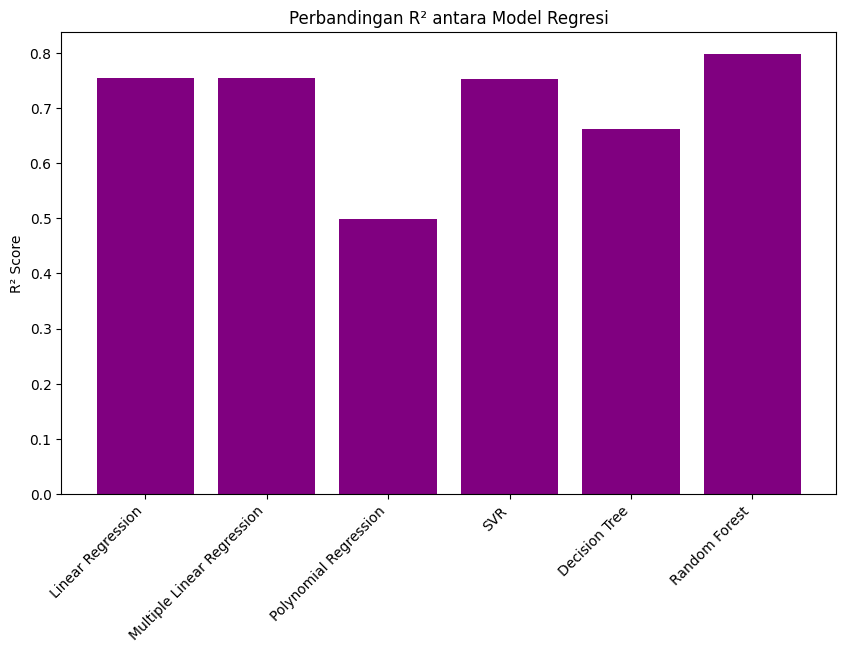

In [16]:
# Visualisasi perbandingan R² antara model-model 
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R²'], color='purple')
plt.ylabel('R² Score')
plt.title('Perbandingan R² antara Model Regresi')
plt.xticks(rotation=45, ha='right')
plt.show()

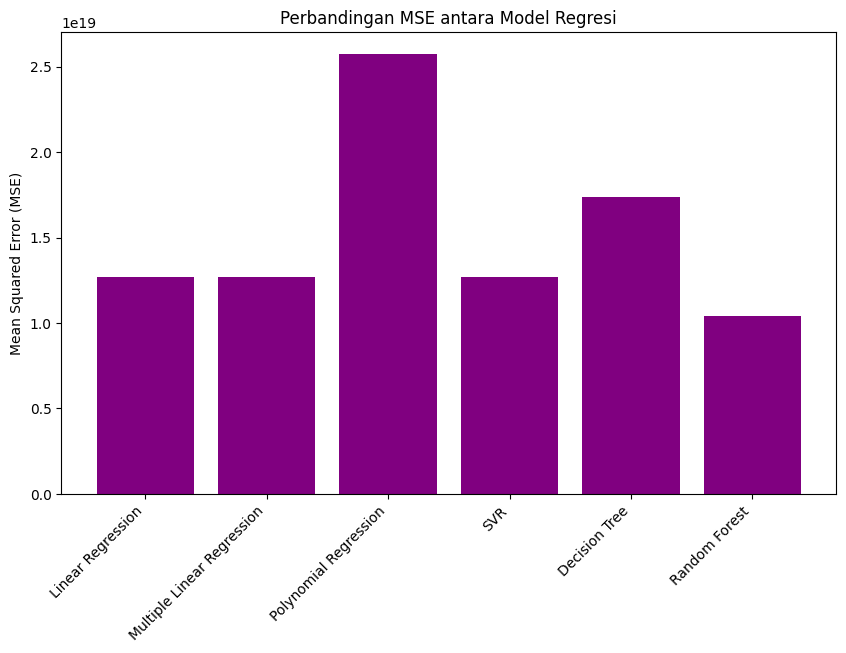

In [17]:
# Visualisasi perbandingan MSE antara model
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['MSE'], color='purple')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Perbandingan MSE antara Model Regresi')
plt.xticks(rotation=45, ha='right')
plt.show()